# Wine Quality Project 3:

# Red Wine Quality Prediction

Problem Statement: 
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

Submission Details

Share the link of the repository as your submission.
Downlaod Files: https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [191]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [192]:
#Loading the Red Wine dataset
df=pd.read_csv('winequality-red.csv')
df.head() #The head(..) function of pandas helps in viewing the preview of the dataset for n-number of rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [193]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


I can observe that the target variable in the dataset is a integer type data, so i can say that the above problem is a classification problem.

# EDA:

In [194]:
df.shape

(1599, 12)

There are 1599 rows and 12 columns in our dataset.

In [195]:
df.columns #to find all the column names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [196]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Except my target variable all other features are float type data,and my target variable is integer type data

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


I can see there is no null values in my features and also there data type and memory usage by the data.

In [198]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

The unique values of each column can be seen above.

In [199]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [200]:
df.isnull().sum().sum()

0

I can see there is no null values in the dataset.Even though let me check if there are any empty(space) observations exists in my target column.

In [201]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Here by i can notice all the unique values in my target column.

In [202]:
df.loc[df['quality'] == " "]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


So i can see there is no empty observations in my target column.

In [203]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

I have 6 unique values in my target column, hence it is a multiclassification problem.And i have to check there value count.

In [204]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Here i have observed that the counts of wine with quality 5,6,7 are high compared to wine with quality 4,8 & 3.

# Visualizing using pie chart to get better vission on unique data count of my target column:

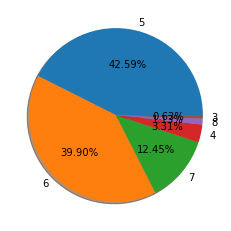

In [205]:
labels='5','6','7','4','8','3'
fig, ax = plt.subplots()
ax.pie(df['quality'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

I can clearly see that the wines with quality 3,4 & 8 are very less in count,mean while wines with quality 5,6 & 7 are more in count.This pie plot gives me a best visualization on my target data.

In [206]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


I can see all the statistics about the dataset includes count:-I can see there is no missing values, mean:-mean of each and every column, std:-standard deviation, min:- the minimum value in each column, max:-maximum value of the column.

# Converting multiclassification into binary classification using bins:

In [207]:
#Lets convert target variable into binary classification problem 
bins = (2, 6.5, 8)
classes = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classes)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


I have changed my target variable from multiclassification to binary classification problem using conditions <7 as bad and >7 as good.

# Label Encoding:

In [208]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for column in df.quality:
    df['quality']=LE.fit_transform(df['quality'])

Using label encoder for target column.

In [209]:
df["quality"].unique()

array([0, 1], dtype=int64)

I have encoded the data using label encoding and i can see the unique values of target column now.

# Univariate Analysis:

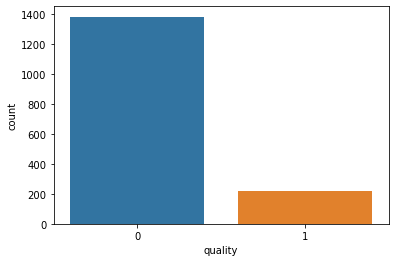

In [210]:
sns.countplot(df['quality']);

By looking at this count plot i can observe there is a data imbalance issue in my target variable.

I can use either over-sampling or under-sampling to balance the data.Since we can loose data in under-sampling it is prefered to use over-sampling.

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

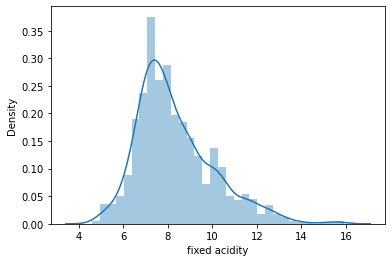

In [211]:
sns.distplot(df['fixed acidity'])

The distribution of fixed acidity looks skewed.

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

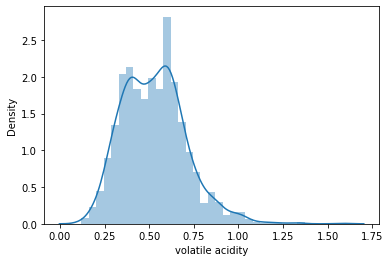

In [212]:
sns.distplot(df['volatile acidity'])

The distribution of volatile acidity looks skewed.

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

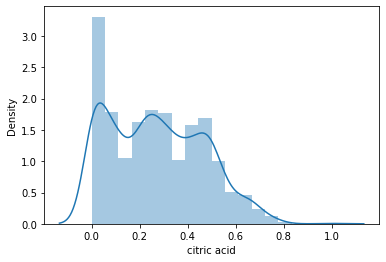

In [213]:
sns.distplot(df['citric acid'])

The distribution of citric acid looks skewed.

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

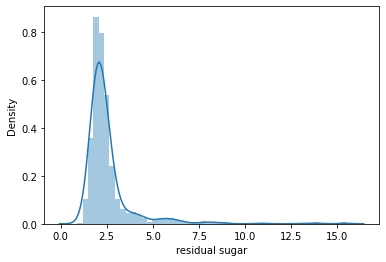

In [214]:
sns.distplot(df['residual sugar'])

The distribution of residual sugar looks skewed.

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

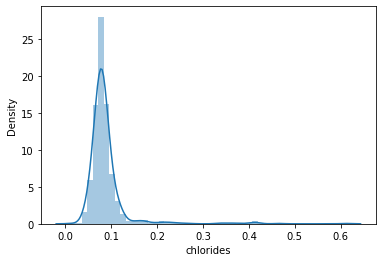

In [215]:
sns.distplot(df['chlorides'])

The distribution of chlorides looks skewed.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

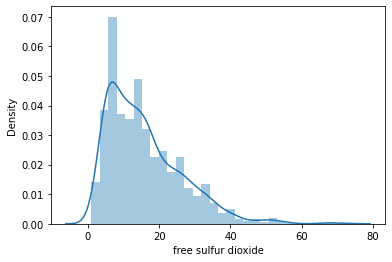

In [216]:
sns.distplot(df['free sulfur dioxide'])

The distribution of free sulfur dioxide also looks skewed.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

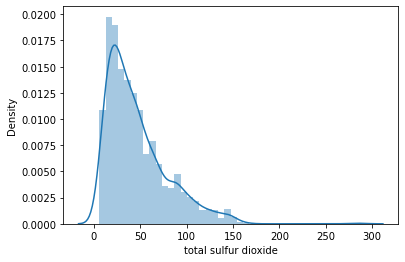

In [217]:
sns.distplot(df['total sulfur dioxide'])

The distribution of total sulfur dioxide looks skewed.

<AxesSubplot:xlabel='density', ylabel='Density'>

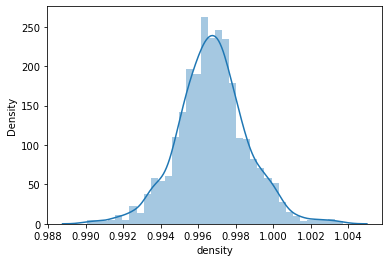

In [218]:
sns.distplot(df['density'])

The distribution of density looks normal.

<AxesSubplot:xlabel='pH', ylabel='Density'>

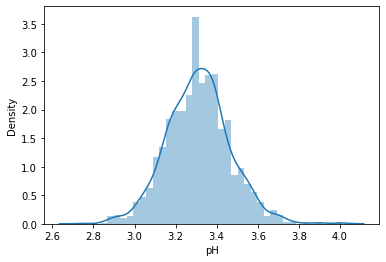

In [219]:
sns.distplot(df['pH'])

The distribution of pH looks almost normal.

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

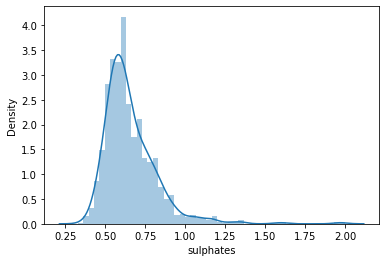

In [220]:
sns.distplot(df['sulphates'])

The distribution of sulphates looks skewed.

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

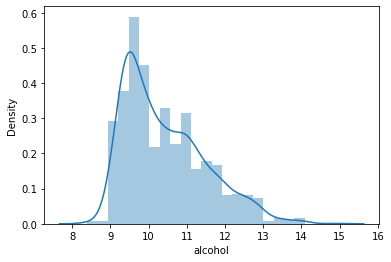

In [221]:
sns.distplot(df['alcohol'])

The distribution of alcohol looks skewed.

# Bivariate analysis:

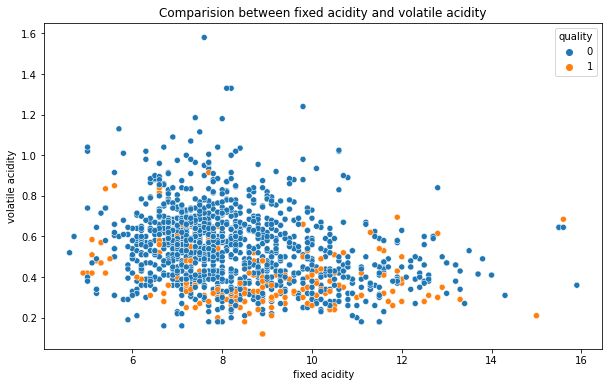

In [222]:
plt.figure(figsize=[10,6])
plt.title('Comparision between fixed acidity and volatile acidity')
sns.scatterplot(df['fixed acidity'],df['volatile acidity'],hue=df["quality"]);

It looks difficult to analyse but still all the wines with fixed acidity from range 6-11 are having volatile acidity rangeing in between 0.3-0.8.

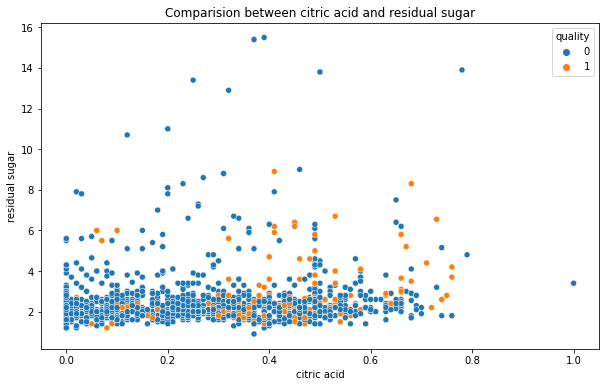

In [223]:
plt.figure(figsize=[10,6])
plt.title('Comparision between citric acid and residual sugar')
sns.scatterplot(df['citric acid'],df['residual sugar'],hue=df["quality"]);

For all the wines with citric acid ranging from 0.0-0.7 residual sugar value will be in the range of 1-3.

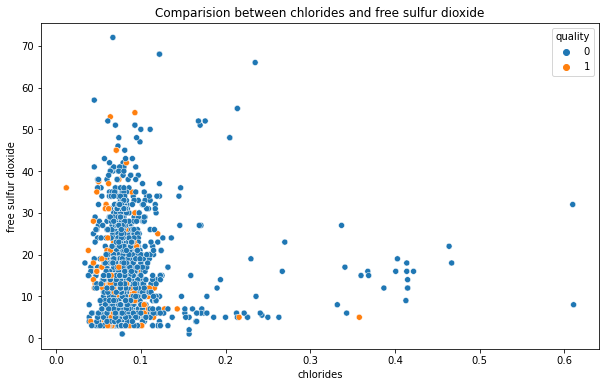

In [224]:
plt.figure(figsize=[10,6])
plt.title('Comparision between chlorides and free sulfur dioxide')
sns.scatterplot(df['chlorides'],df['free sulfur dioxide'],hue=df["quality"]);

The wine with chlorides value 0.0-0.2 has free sulfur dioxide value in the range 0-40.

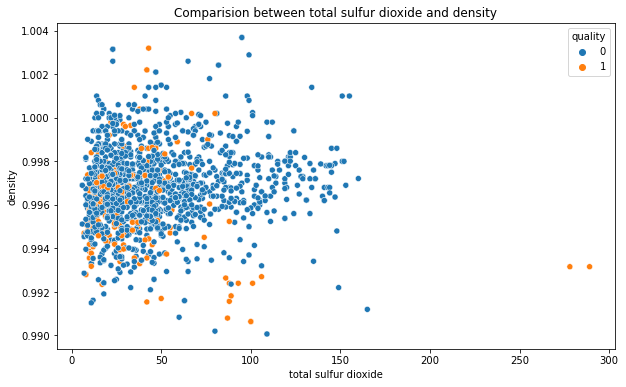

In [225]:
plt.figure(figsize=[10,6])
plt.title('Comparision between total sulfur dioxide and density')
sns.scatterplot(df['total sulfur dioxide'],df['density'],hue=df["quality"]);

It looks all the wine qualities are scattered with density and total sulfur dioxide.

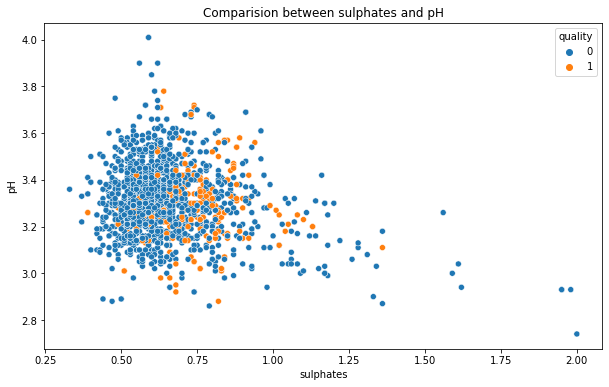

In [226]:
plt.figure(figsize=[10,6])
plt.title('Comparision between sulphates and pH')
sns.scatterplot(df['sulphates'],df['pH'],hue=df["quality"]);

It looks all the wine qualities are scattered with ph and sulphates.

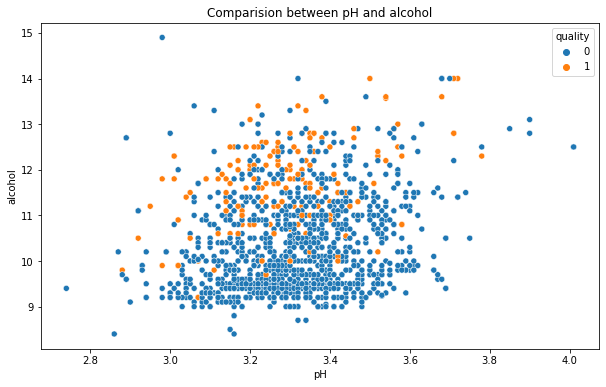

In [227]:
plt.figure(figsize=[10,6])
plt.title('Comparision between pH and alcohol')
sns.scatterplot(df['pH'],df['alcohol'],hue=df["quality"]);

It looks all the wine qualities are scattered with ph and alcohol.

# Multivariate analysis:

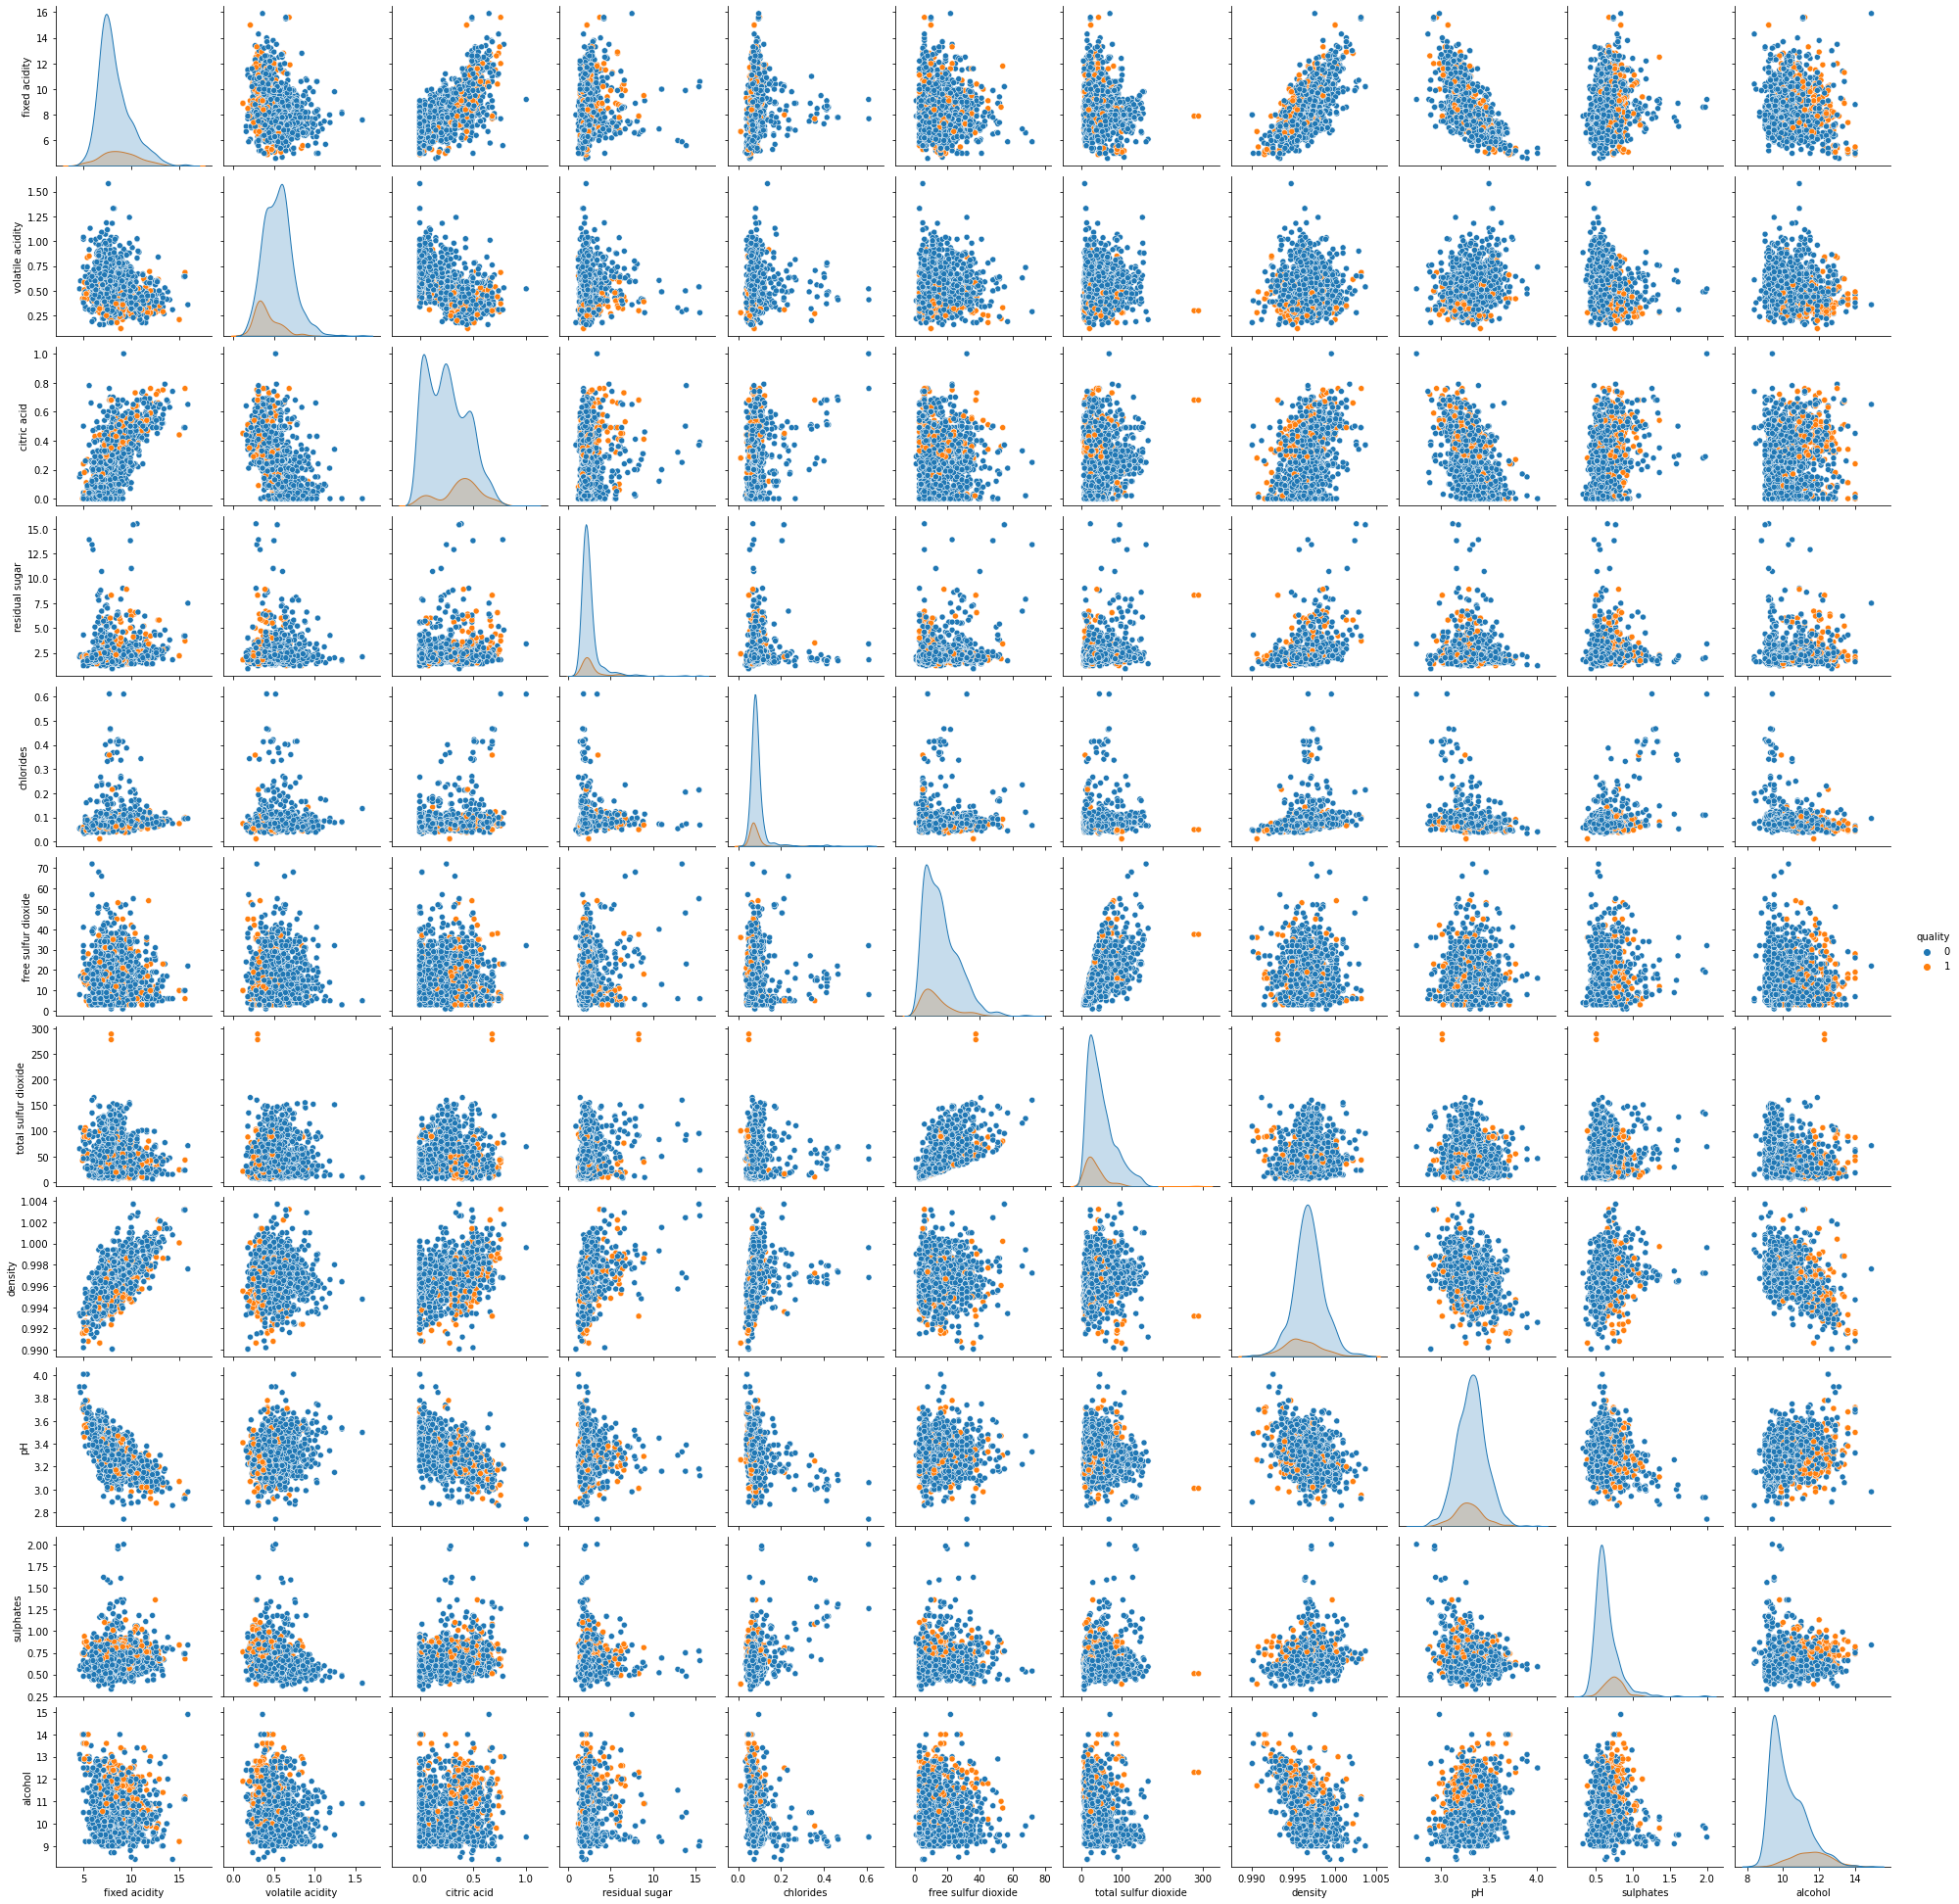

In [228]:
sns.pairplot(df,hue="quality")

Looking at this pair plot we can easily visualize the relationship between each pair of features.

# Identifying the outliers:

<AxesSubplot:>

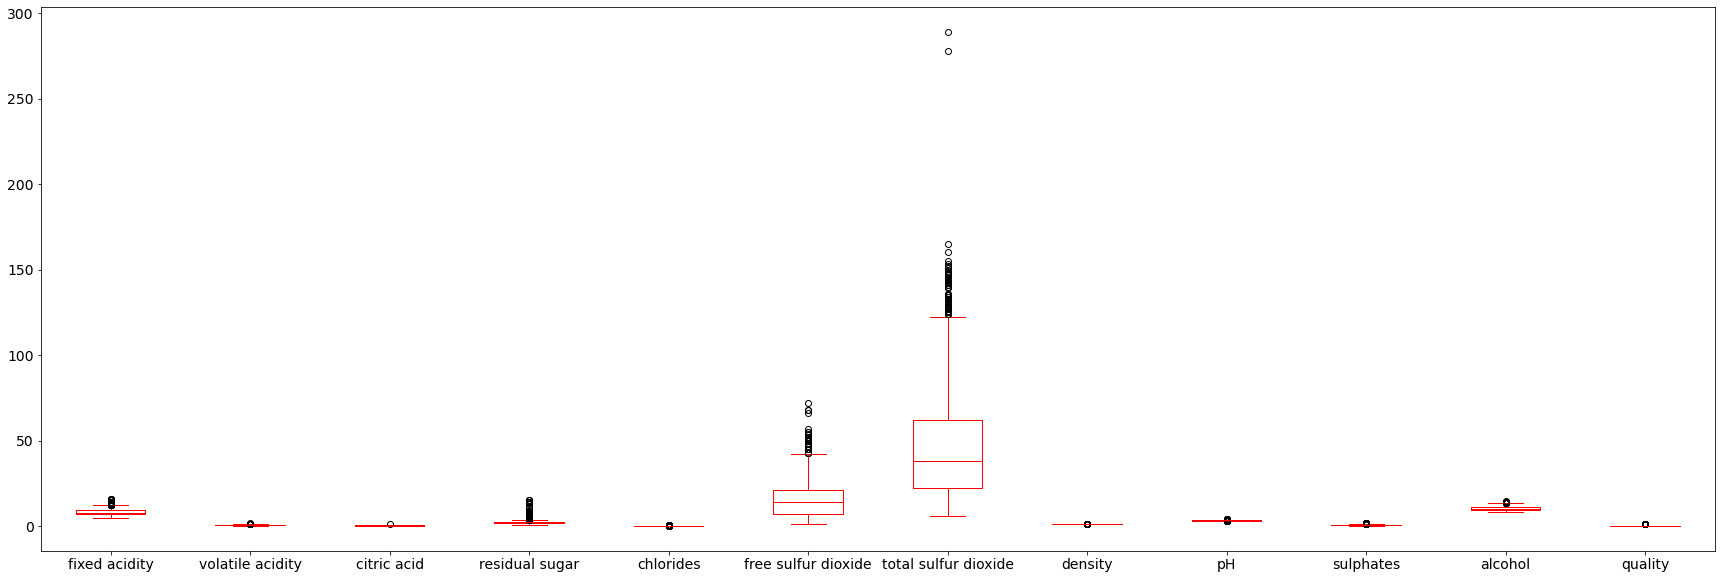

In [229]:
df.plot(kind='box',fontsize=14,figsize=(30,10),color='r')

There are outliers in every column including my target variable, but keeping target variable as it is(Since i don't want my target to be manupulated) let me remove all other outlers in other columns.

# Removing outliers:

In [230]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# i) Zscore method:

In [231]:
dfContCols=df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]

Taking all the colums with outliers as a list of dfContCols.

In [232]:
from scipy.stats import zscore
z=np.abs(zscore(dfContCols))
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


I have removed all outliers and stored new data set as df_new.

In [233]:
df_new.shape

(1458, 12)

The shape of new dataset is 1458 rows and 12 columns.

In [234]:
df.shape

(1599, 12)

Shape of old dataset.

In [235]:
(((1599-1458)/1599)*100)

8.818011257035648

The data loss is less than 10% in zscore method.Let me check by IQR method.

# ii) IQR method:

In [236]:
Q1=dfContCols.quantile(0.25)
Q3=dfContCols.quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Formula and coding for IQR method.I have removed outliers using IQR method.

In [237]:
df_1.shape

(1194, 12)

The shape of new dataset is 1194 rows and 12 columns.

In [238]:
df.shape

(1599, 12)

Shape of old dataset.

In [239]:
(((1599-1194)/1599)*100)

25.328330206378986

I can see a great data loss in IQR method so let me consider zscore method to remove outliers.

# Checking for Skewness:

In [240]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

I can observe

fixed acidity

residual sugar

chlorides

free sulfur dioxide

total sulfur dioxide

sulphates

alcohol columns are skewed.

# Removing skewness using log transform:

Since the data is continuous we have to use log transformation to remove skewness.

In [241]:
features=['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

Assigning variable features as the list of features with skewness.

In [242]:
df_new['fixed acidity'] = np.log(df_new['fixed acidity'])
df_new['residual sugar'] = np.log(df_new['residual sugar'])
df_new['chlorides'] = np.log(df_new['chlorides'])
df_new['free sulfur dioxide'] = np.log(df_new['free sulfur dioxide'])
df_new['total sulfur dioxide'] = np.log(df_new['total sulfur dioxide'])
df_new['sulphates'] = np.log(df_new['sulphates'])
df_new['alcohol'] = np.log(df_new['alcohol'])

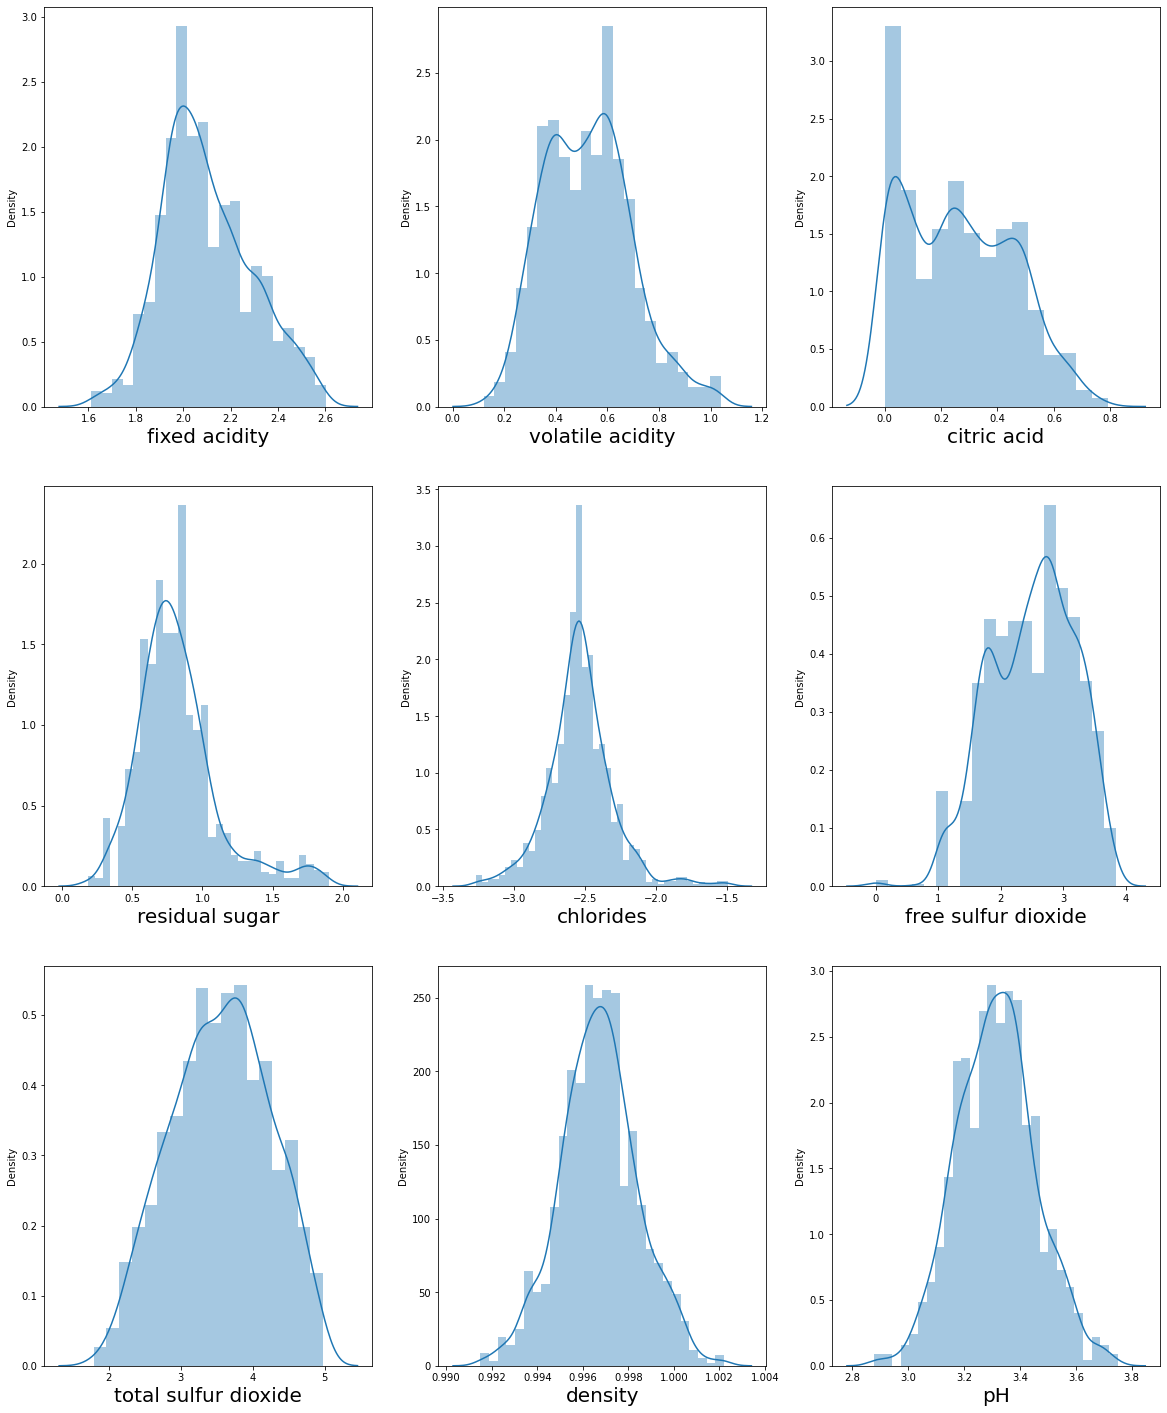

In [243]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

Now looking into the distribution plot we can see the data is almost normally distributed compared to previous one.

# Feature selection using correlation matrix with heat map:

In [244]:
cor=df_new.corr()

Defined cor as the correlation of df_new.

In [245]:
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.295813,0.692400,0.204999,0.232103,-0.170132,-0.096951,0.664021,-0.721165,0.190975,-0.039221,0.119643
volatile acidity,-0.295813,1.000000,-0.589286,0.036963,0.079752,0.046278,0.099221,-0.000446,0.252900,-0.356126,-0.212932,-0.268236
citric acid,0.692400,-0.589286,1.000000,0.188923,0.104443,-0.107676,-0.027290,0.372338,-0.521270,0.308570,0.163495,0.226809
residual sugar,0.204999,0.036963,0.188923,1.000000,0.184832,0.011565,0.098075,0.383786,-0.077378,0.067932,0.162090,0.096110
chlorides,0.232103,0.079752,0.104443,0.184832,1.000000,-0.030588,0.077908,0.393204,-0.202248,0.002094,-0.259783,-0.135898
free sulfur dioxide,-0.170132,0.046278,-0.107676,0.011565,-0.030588,1.000000,0.778888,-0.041086,0.132344,0.045477,-0.091476,-0.095752
total sulfur dioxide,-0.096951,0.099221,-0.027290,0.098075,0.077908,0.778888,1.000000,0.140454,0.032708,0.006369,-0.267830,-0.183569
density,0.664021,-0.000446,0.372338,0.383786,0.393204,-0.041086,0.140454,1.000000,-0.311217,0.133096,-0.465070,-0.154221
pH,-0.721165,0.252900,-0.521270,-0.077378,-0.202248,0.132344,0.032708,-0.311217,1.000000,-0.025521,0.137757,-0.079528
sulphates,0.190975,-0.356126,0.308570,0.067932,0.002094,0.045477,0.006369,0.133096,-0.025521,1.000000,0.253730,0.312522


I can see the correlation of each pair of features, but it is difficult to analyse looking at this table.So let me visualize it using heat map.

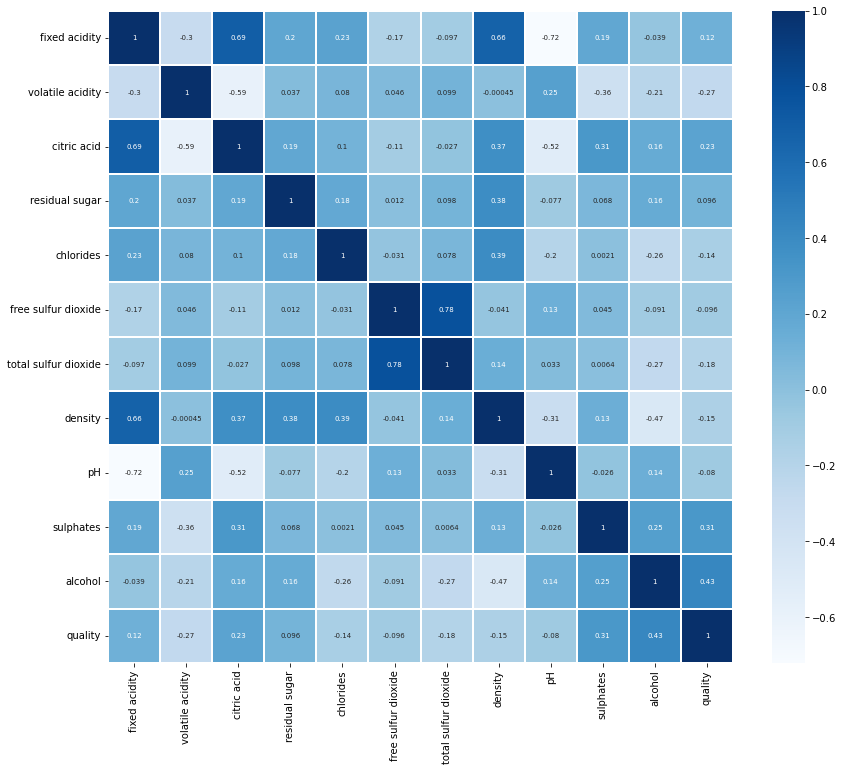

In [246]:
plt.figure(figsize=(14,12))
sns.heatmap(df_new.corr(),linewidths=.1,cmap="Blues",annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

I can observe residual sugar and free sulfur dioxide is less correlated with my target variable, and also fixed acidity is highly correalted with citric acid.If necessary i can remove those columns.

In [247]:
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.426751
sulphates               0.312522
citric acid             0.226809
fixed acidity           0.119643
residual sugar          0.096110
pH                     -0.079528
free sulfur dioxide    -0.095752
chlorides              -0.135898
density                -0.154221
total sulfur dioxide   -0.183569
volatile acidity       -0.268236
Name: quality, dtype: float64

Alcohol, sulphates, citric acid, volatile acidity, total sulphur dioxide, density are higly correalted with the target variable.

# Visualizeing correlation using bar plot:

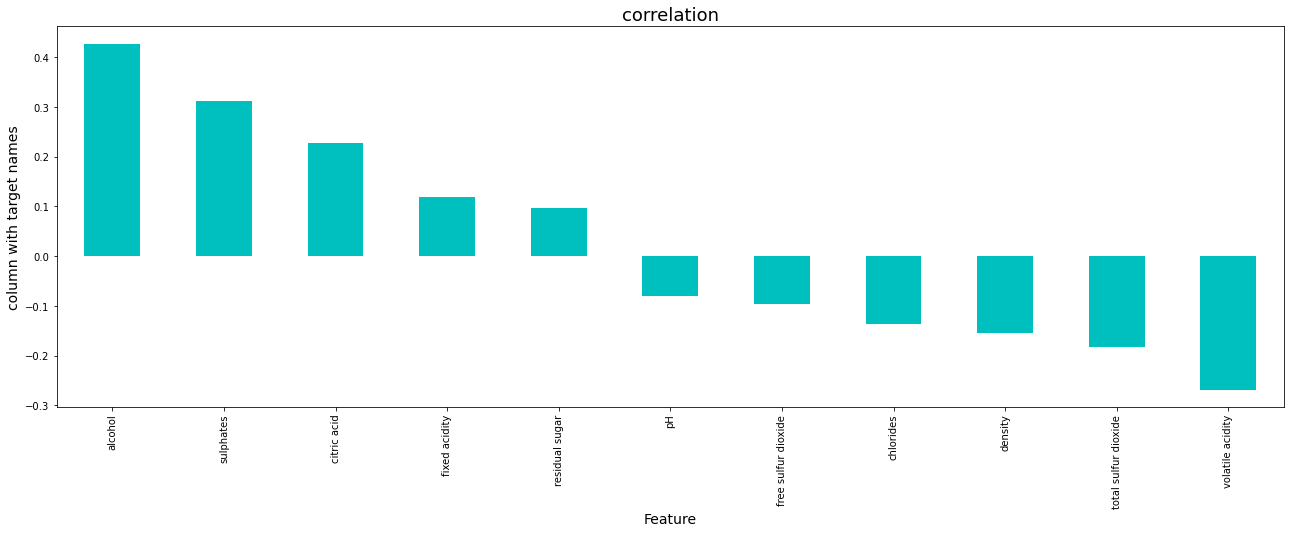

In [248]:
plt.figure(figsize=(22,7))
df_new.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

It looks better to analyse now, i can observe very less correlation in column residual sugar and pH.

In [249]:
df_new = df_new.drop(["free sulfur dioxide"],axis=1)

I have removed free sulfur dioxide column since it is less correlated with target variable.

In [250]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,0.700,0.00,0.641854,-2.577022,3.526361,0.99780,3.51,-0.579818,2.240710,0
1,2.054124,0.880,0.00,0.955511,-2.322788,4.204693,0.99680,3.20,-0.385662,2.282382,0
2,2.054124,0.760,0.04,0.832909,-2.385967,3.988984,0.99700,3.26,-0.430783,2.282382,0
3,2.415914,0.280,0.56,0.641854,-2.590267,4.094345,0.99800,3.16,-0.544727,2.282382,0
4,2.001480,0.700,0.00,0.641854,-2.577022,3.526361,0.99780,3.51,-0.579818,2.240710,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,0.600,0.08,0.693147,-2.407946,3.784190,0.99490,3.45,-0.544727,2.351375,0
1595,1.774952,0.550,0.10,0.788457,-2.780621,3.931826,0.99512,3.52,-0.274437,2.415914,0
1596,1.840550,0.510,0.13,0.832909,-2.577022,3.688879,0.99574,3.42,-0.287682,2.397895,0
1597,1.774952,0.645,0.12,0.693147,-2.590267,3.784190,0.99547,3.57,-0.342490,2.322388,0


This is my new dataset after cleaning.

# Preprocessing:

In [251]:
x = df_new.drop("quality",axis=1)
y = df_new["quality"]

Assigning y as target variable and x as rest all the features.

In [252]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,0.700,0.00,0.641854,-2.577022,3.526361,0.99780,3.51,-0.579818,2.240710
1,2.054124,0.880,0.00,0.955511,-2.322788,4.204693,0.99680,3.20,-0.385662,2.282382
2,2.054124,0.760,0.04,0.832909,-2.385967,3.988984,0.99700,3.26,-0.430783,2.282382
3,2.415914,0.280,0.56,0.641854,-2.590267,4.094345,0.99800,3.16,-0.544727,2.282382
4,2.001480,0.700,0.00,0.641854,-2.577022,3.526361,0.99780,3.51,-0.579818,2.240710
...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,0.600,0.08,0.693147,-2.407946,3.784190,0.99490,3.45,-0.544727,2.351375
1595,1.774952,0.550,0.10,0.788457,-2.780621,3.931826,0.99512,3.52,-0.274437,2.415914
1596,1.840550,0.510,0.13,0.832909,-2.577022,3.688879,0.99574,3.42,-0.287682,2.397895
1597,1.774952,0.645,0.12,0.693147,-2.590267,3.784190,0.99547,3.57,-0.342490,2.322388


All independent variables.

In [253]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1458, dtype: int64

# Scaling data using Min-Max Scaler:

In [254]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [255]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

It's the coding for scaling using Min-Max Scaler.

In [256]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.394706,0.630435,0.000000,0.267203,0.388764,0.544620,0.588785,0.724138,0.420692,0.233435
1,0.447707,0.826087,0.000000,0.449585,0.531356,0.757599,0.495327,0.367816,0.575141,0.319922
2,0.447707,0.695652,0.050633,0.378296,0.495921,0.689872,0.514019,0.436782,0.539248,0.319922
3,0.811955,0.173913,0.708861,0.267203,0.381336,0.722952,0.607477,0.321839,0.448607,0.319922
4,0.394706,0.630435,0.000000,0.267203,0.388764,0.544620,0.588785,0.724138,0.420692,0.233435
...,...,...,...,...,...,...,...,...,...,...
1453,0.216573,0.521739,0.101266,0.297029,0.483594,0.625572,0.317757,0.655172,0.448607,0.463109
1454,0.166639,0.467391,0.126582,0.352448,0.274572,0.671926,0.338318,0.735632,0.663620,0.597051
1455,0.232682,0.423913,0.164557,0.378296,0.388764,0.595647,0.396262,0.620690,0.653084,0.559656
1456,0.166639,0.570652,0.151899,0.297029,0.381336,0.625572,0.371028,0.793103,0.609484,0.402949


This is the data after scaling.(Using Min-Max Scaler the range of data will be from 0-1).

In [257]:
y.value_counts()

0    1257
1     201
Name: quality, dtype: int64

We can observe that the highest count is 1257 so let me do over sampling and get the count of all unique quality as 1257.

# Balancing data using over-sampling:

In [258]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x, y=SM.fit_resample(x, y)

ModuleNotFoundError: No module named 'imblearn'

In [259]:
y.value_counts()

0    1257
1     201
Name: quality, dtype: int64

# Finding best random_state:

In [260]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.908675799086758  on Random_state  4


In [261]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Classification Algorithms:

In [262]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# i) Logistic Regression:

In [263]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       380
           1       0.68      0.22      0.34        58

    accuracy                           0.88       438
   macro avg       0.79      0.60      0.64       438
weighted avg       0.87      0.88      0.86       438



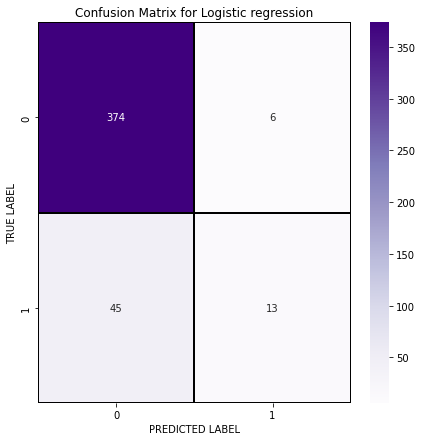

In [264]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic regression')
plt.show()

# ii) DecisionTreeClassifier:

In [265]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       380
           1       0.59      0.64      0.61        58

    accuracy                           0.89       438
   macro avg       0.77      0.78      0.77       438
weighted avg       0.90      0.89      0.89       438



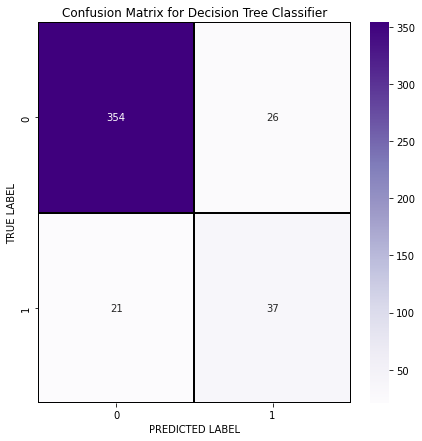

In [266]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# iii) RandomForestClassifier:

In [267]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred = RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       380
           1       0.80      0.57      0.67        58

    accuracy                           0.92       438
   macro avg       0.87      0.77      0.81       438
weighted avg       0.92      0.92      0.92       438



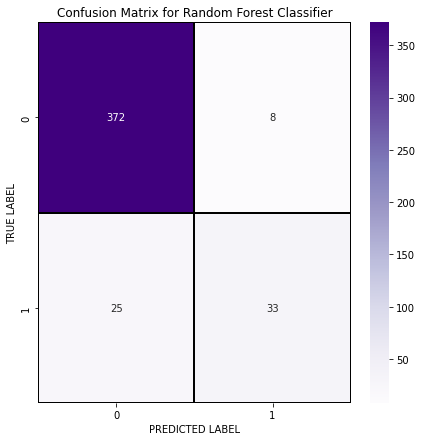

In [268]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# iv) Support Vector Classifier:

In [269]:
SV=SVC()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       380
           1       0.76      0.33      0.46        58

    accuracy                           0.90       438
   macro avg       0.83      0.66      0.70       438
weighted avg       0.89      0.90      0.88       438



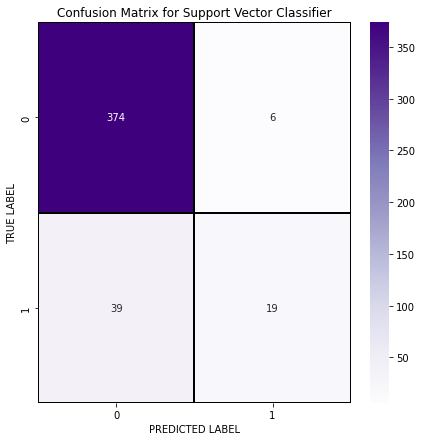

In [270]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# v) K-Nearest Neighbours:

In [271]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       380
           1       0.65      0.45      0.53        58

    accuracy                           0.89       438
   macro avg       0.78      0.71      0.74       438
weighted avg       0.88      0.89      0.89       438



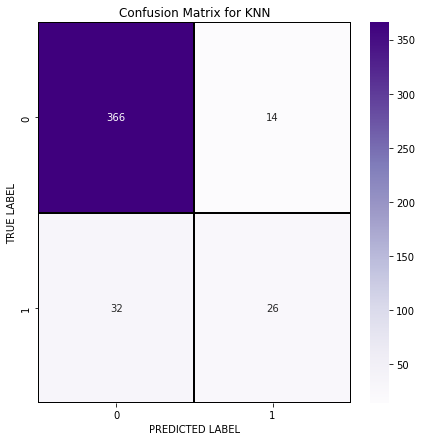

In [272]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN')
plt.show()

# Cross Validation:

In [273]:
from sklearn.model_selection import cross_val_score

In [274]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.8751729981641011


In [275]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8223155863107847


In [276]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8751682907310643


In [277]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.8758414536553218


In [278]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.849759920915125


# So SVC is my best model let me apply Hyper parametric tuning for SVC.

# Hyper parametric tunning:

In [279]:
from sklearn.model_selection import GridSearchCV

In [280]:
parameter = {'C':[0.01,0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale','auto'],'tol':[0.0001,0.001,0.01,0.1]}

In [281]:
GCV=GridSearchCV(SVC(),parameter,cv=5)

In [282]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]})

In [283]:
GCV.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.1}

In [284]:
Final_mod=SVC(C=10,gamma='scale',kernel='rbf',tol=0.0001)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

89.95433789954338


# ROC AUC curve:

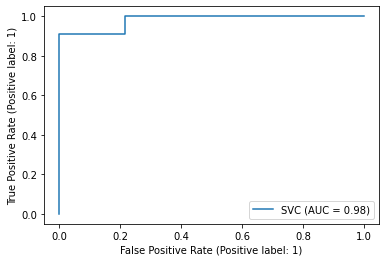

In [285]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = SVC(random_state=134)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This shows the roc curve which is produced by calculating the true positive rate against false positive rate for SVC and auc value is AUC=.98 which is good.

# Saving the model:

In [286]:
import joblib
joblib.dump(Final_mod,"RedWine.pkl")

['RedWine.pkl']

# DONE